In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", 100)

In [2]:
# import discover data, and filter for list of emails according to their earliest use of discover
discover_data = pd.read_csv("discover_print_to_csv.csv")

columns_to_convert_list = ['concerns_addressed','match','request.concerns','reviews']

for column in columns_to_convert_list:
    # blank entries need to be filled with a string of empty list first  
    # in order for the function ast.literal_eval() to work
    discover_data[column] = discover_data[column].fillna("[]").map(lambda x: ast.literal_eval(x))

def remove_skin_types(x):
    terms_to_delete = ['Sensitivity', 'Combination','Dry to Very Dry', 'Normal', 'Oily']
    replacement_list = []
    for entry in x:
        if entry in terms_to_delete:
            del entry
        else:
            replacement_list.append(entry)
    return replacement_list
discover_data['request.concerns'] = discover_data['request.concerns'].map(remove_skin_types)

In [27]:
discover_data['request.concerns'].apply(pd.Series).stack()

0      0    Enlarged Pores
       1              Acne
       2        Sun Damage
       3           Redness
       4          Dullness
       5               PIH
1      0    Enlarged Pores
       1              Acne
       2        Sun Damage
       3           Redness
       4          Dullness
       5               PIH
2      0    Enlarged Pores
       1              Acne
       2        Sun Damage
       3           Redness
       4          Dullness
       5               PIH
3      0    Enlarged Pores
       1              Acne
       2        Sun Damage
       3           Redness
       4          Dullness
       5               PIH
4      0    Enlarged Pores
       1              Acne
       2        Sun Damage
       3           Redness
       4          Dullness
       5               PIH
                 ...      
42463  2       Dehydration
       3    Uneven Texture
42464  0    Enlarged Pores
       1              Acne
       2       Dehydration
       3    Uneven Texture
4

In [38]:
test_df = pd.DataFrame.from_dict({'apple': [0,1,2,3],
                                 'pear':[1,2,3,4]})
test_df.unstack()

TypeError: 'MultiIndex' object is not callable

In [15]:
correlation_df.sum()

Acne                29881
Clogged Pores       26609
Dehydration         18096
Dullness            21661
Enlarged Pores      25736
Loss of Firmness    13396
Men                  4990
PIH                 23229
Redness             12184
Sun Damage          12392
Uneven Texture      21275
Wrinkles            13649
dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


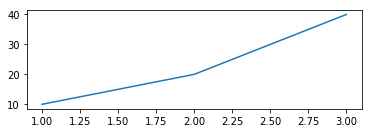

In [70]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,2)
ax2 = fig.add_subplot(2,1,2)
x_values = {'apple': [1,2,3]}
y_values = {'pear': [10, 20, 40]}
ax1.plot(x_values['apple'], y_values['pear'])
plt.show()

In [79]:
listing = pd.DataFrame([0,1,2,"apple",4,5,6,7,8])
listing.iloc[:"apple"]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [apple] of <class 'str'>

AttributeError: 'function' object has no attribute 'add_subplot'

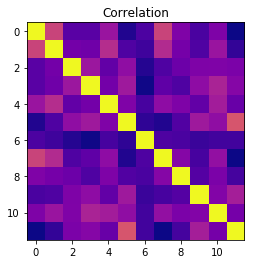

In [49]:

correlation_df = pd.get_dummies(discover_data['request.concerns'].apply(pd.Series).stack()).sum(level=0)

plt.imshow(correlation_df.corr(), cmap='plasma', interpolation='none')
plt.title('Correlation')
plt.figure.add_subplot(111).set_xticklabels(['']+list(correlation_df.columns))
plt.colorbar()
plt.show()

In [47]:
list(correlation_df.columns)

['Acne',
 'Clogged Pores',
 'Dehydration',
 'Dullness',
 'Enlarged Pores',
 'Loss of Firmness',
 'Men',
 'PIH',
 'Redness',
 'Sun Damage',
 'Uneven Texture',
 'Wrinkles']

In [9]:
correlation_df.corr()

,Acne,Clogged Pores,Dehydration,Dullness,Enlarged Pores,Loss of Firmness,Men,PIH,Redness,Sun Damage,Uneven Texture,Wrinkles
Acne,1.000000,0.406024,0.022339,0.021613,0.215072,-0.123888,-0.016032,0.408199,0.134563,-0.017695,0.130648,-0.162434
Clogged Pores,0.406024,1.000000,0.097988,0.086599,0.315056,-0.005744,-0.051177,0.309759,0.103060,-0.004479,0.218640,-0.085000
Dehydration,0.022339,0.097988,1.000000,0.226746,0.047965,0.186052,-0.114350,-0.006676,0.075222,0.132029,0.133287,0.121592
Dullness,0.021613,0.086599,0.226746,1.000000,0.098434,0.232998,-0.155210,0.038250,-0.007935,0.179190,0.275018,0.151439
Enlarged Pores,0.215072,0.315056,0.047965,0.098434,1.000000,0.133738,-0.029507,0.180290,0.132123,0.046875,0.248946,0.065827
Loss of Firmness,-0.123888,-0.005744,0.186052,0.232998,0.133738,1.000000,-0.092845,-0.123161,-0.002657,0.233070,0.185489,0.475222
Men,-0.016032,-0.051177,-0.114350,-0.155210,-0.029507,-0.092845,1.000000,-0.011505,-0.018458,-0.064537,-0.042990,-0.040351
PIH,0.408199,0.309759,-0.006676,0.038250,0.180290,-0.123161,-0.011505,1.000000,0.151948,-0.028311,0.195154,-0.158737
Redness,0.134563,0.103060,0.075222,-0.007935,0.132123,-0.002657,-0.018458,0.151948,1.000000,0.006676,0.121588,-0.032240
Sun Damage,-0.017695,-0.004479,0.132029,0.179190,0.046875,0.233070,-0.064537,-0.028311,0.006676,1.000000,0.142271,0.259523


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

,Serial,Name,SKU,auto_include,concerns_addressed,concerns_addressed_count,email,handle,match,min_req,rating,request.ageRange,request.concerns,request.gender,request.name,request.sensitivity,request.skinType,reviews,timestamp,type
0,0,Earth Sourced Gentle Cleansing Gel,8500,NaN,[Sensitivity],1,yaminnphyu@mail.com,earth-sourced-perfectly-natural-cleansing-gel,[Sensitivity],['Sensitivity'],95,30.0,"[Enlarged Pores, Acne, Sun Damage, Redness, Du...",2,Yaminn Phyu,True,Oily,"[None, 15, 12, 11, 31, 96]","September 10th 2017, 3:27:26 am",Cleanser
1,1,Earth Sourced Purely Natural Refreshing Toner,8510,NaN,"[Dehydration, Sensitivity]",1,yaminnphyu@mail.com,earth-sourced-purely-natural-refreshing-toner,[Sensitivity],['Sensitivity'],83,30.0,"[Enlarged Pores, Acne, Sun Damage, Redness, Du...",2,Yaminn Phyu,True,Oily,"[None, 9, 5, 7, 22, 76]","September 10th 2017, 3:27:26 am",Toner
2,2,Clear Regular Strength Anti-Redness Exfoliatin...,6200,NaN,"[Clogged Pores, Uneven Texture, Enlarged Pores...",5,yaminnphyu@mail.com,clear-regular-strength-anti-redness-exfoliatin...,"[Enlarged Pores, PIH, Redness, Sensitivity, Acne]",['Acne'],85,30.0,"[Enlarged Pores, Acne, Sun Damage, Redness, Du...",2,Yaminn Phyu,True,Oily,"[None, 16, 20, 23, 47, 214]","September 10th 2017, 3:27:26 am",Exfoliant
3,3,Resist Ultra-Light Super Antioxidant Concentra...,7740,NaN,"[Dullness, Wrinkles, PIH, Enlarged Pores, Unev...",8,yaminnphyu@mail.com,resist-ultra-light-super-antioxidant-concentra...,"[Dullness, PIH, Enlarged Pores, Oily, Dullness...","['Dehydration', 'Clogged Pores', 'Enlarged Por...",79,30.0,"[Enlarged Pores, Acne, Sun Damage, Redness, Du...",2,Yaminn Phyu,True,Oily,"[None, 20, 27, 23, 37, 248]","September 10th 2017, 3:27:26 am",Serum
4,4,Resist C15 Super Booster,7770,NaN,"[Dehydration, PIH, Redness, Uneven Texture, Wr...",4,yaminnphyu@mail.com,resist-c15-super-booster,"[PIH, Redness, Dullness, Sun Damage]",['None'],74,30.0,"[Enlarged Pores, Acne, Sun Damage, Redness, Du...",2,Yaminn Phyu,True,Oily,"[None, 53, 60, 65, 84, 427]","September 10th 2017, 3:27:26 am",Booster
5,5,Clear Ultra-Light Daily Mattifying Fluid SPF 30,6130,NaN,"[Clogged Pores, Enlarged Pores, Acne]",2,yaminnphyu@mail.com,clear-ultra-light-daily-mattifying-fluid-spf30,"[Enlarged Pores, Acne]",['Acne'],87,30.0,"[Enlarged Pores, Acne, Sun Damage, Redness, Du...",2,Yaminn Phyu,True,Oily,"[None, 11, 14, 22, 20, 67]","September 10th 2017, 3:27:26 am",SPF
6,6,Skin Balancing Invisible Finish Moisture Gel,3400,NaN,[Enlarged Pores],1,yaminnphyu@mail.com,skin-balancing-invisible-finish-moisture-gel,[Enlarged Pores],"['Combination', 'Oily']",80,30.0,"[Enlarged Pores, Acne, Sun Damage, Redness, Du...",2,Yaminn Phyu,True,Oily,"[None, 21, 20, 27, 50, 219]","September 10th 2017, 3:27:26 am",Moisturizer
7,7,Whitening Mask,2760,NaN,"[Dehydration, Dullness, PIH, Sun Damage]",3,yaminnphyu@mail.com,radiance-renewal-whitening-mask,"[Dullness, PIH, Sun Damage]",['None'],77,30.0,"[Enlarged Pores, Acne, Sun Damage, Redness, Du...",2,Yaminn Phyu,True,Oily,"[None, 5, 5, 10, 2, 50]","September 10th 2017, 3:27:26 am",Mask
8,8,Resist Weightless Body Treatment w/ 2% BHA (Sa...,5700,NaN,"[Clogged Pores, Uneven Texture, Enlarged Pores...",3,yaminnphyu@mail.com,resist-weightless-body-treatment-2-bha,"[Enlarged Pores, Redness, Acne]",['None'],89,30.0,"[Enlarged Pores, Acne, Sun Damage, Redness, Du...",2,Yaminn Phyu,True,Oily,"[None, 20, 26, 36, 55, 295]","September 10th 2017, 3:27:26 am",Body
9,9,Resist Whitening Essence,7960,NaN,"[Dehydration, Wrinkles, Enlarged Pores, PIH, L...",8,yaminnphyu@mail.com,resist-whitening-essence,"[Enlarged Pores, PIH, Dullness, Sun Damage, En...","['Dullness', 'Sun Damage']",67,30.0,"[Enlarged Pores, Acne, Sun Damage, Redness, Du...",2,Yaminn Phyu,True,Oily,"[None, 7, 6, 5, 4, 25]","September 10th 2017, 3:27:26 am",Treatment
